# Optimal Hedged Monte Carlo

Author: Jerry Xia

Date: 2018/06/19

## 1 Introduction

This is a Python Notebook about optimal hedged Monte Carlo (OHMC) in option pricing. We invoke this method to price European options and make comparison with regular Monte Carlo and Black-Scholes formula.

### 1.1 Facts
* The option price is not simply the average value of the discounted future pay-off over the objective (or historical) probability distribution
* The requirement of absence of arbitrage opportunities is equivalent to the existence of "risk-neutral measure", such that the price is indeed its average discounted future pay-off.
* Risk in option trading cannot be eliminated

### 1.2 Objective
* It would be satisfactory to have an option theory where the objective stochastic process of the underlying is used to calculate the option price, the hedge strategy and the *residual risk*.

### 1.3 Advantages
* It is a versatile methods to price complicated path-dependent options.
* Considerable variance reduction scheme for Monte Carlo
* It provide not only a numerical estimate of the option price, but also of the optimal hedge strategy and of the residual risk.
* This method does not rely on the notion of risk-neutral measure, and can be used to any model of the true dynamics of the underlying

## 2 Underlying dynamics

### Black-Scholes Model
$$dS = r S dt + \sigma S dW_t$$
$$log S_{t+1} = log S_t +(r - \frac{\sigma^2}{2})\Delta t + \sigma \sqrt{\Delta t} \epsilon$$
where
    $$\epsilon \sim N(0,1)$$


## 3 Methodology

### 3.1 Simbol Definition
Option price always requires to work backward. That is because the option price is known exactly at the maturity. As with other schemes, we determine the option price step by step from the maturity $t=K\tau=T$ to the present time $t=0$. The unit of time being $\tau$, for example, one day. We simulate $N$ trajectories. In trajectory i, the price of the underlying asset at time $k\tau$ is denoted as $S_k^{(i)}$. The price of the derivative at time $k\tau$ is denoted as $C_k$, and the hedge function is $H_k$. We define an optimal hedged portfolio as
$$W_k^{(i)} = C_k(S_k^{(i)}) + H_k(S_k^{(i)})S_k^{(i)}$$
The one-step change of our portfolio is
$$\Delta W_k^{(i)}= df(k,k+1) C_{k+1}(S_{k+1}^{(i)}) - C_k(S_k^{(i)}) + H_k(S_{k}^{(i)}) (df(k,k+1) S_{k+1}^{(i)} - S_{k}^{(i)})$$
Where $df(k,k+1)$ is the discounted factor from time $k\tau$ to $(k+1) \tau$

### 3.2 Objective
The optimal hedged algorithm can be interpreted as the following optimal problem

\begin{align}
\mbox{minimize}\quad & \quad Var[\Delta W_k]\\
\mbox{subject to}\quad & \quad E[\Delta W_k]=0
\end{align}

It means we should try to minimize the realized volatility of hedged portfolio while maintaining the expected value of portfolio unchanged.

### 3.3 Basis Functions
The original optimization is very difficult to solve. Thus we assume a set of basis function and solved it in such subspace. We use $N_C$and $N_H$ to denote the number of basis functions for price and hedge.

\begin{align}
C_k(\cdot) &= \sum_{i=0}^{N_C} a_{k,i} A_i(\cdot)\\
H_k(\cdot) &= \sum_{i=0}^{N_H} b_{k,i} B_i(\cdot)
\end{align}

The basis functions $A_i$ and $B_i$ are priori determined and need not to be identical. The coefficients $a_i$ and $b_i$ can be calibrated by solving the optimal problem.

### 3.4 Numerical Solution

\begin{align}
\mbox{minimize}\quad & \quad \frac{1}{N} \sum_{i=1}^N \Delta W_k^{(i)2}\\
\mbox{subject to}\quad & \quad \frac{1}{N} \sum_{i=1}^N \Delta W_k^{(i)}=0
\end{align}

Denote the discounted forward underlying price change at time $k\tau$ as

$$\Delta S_k = df(k,k+1) S_{k+1} - S_k$$

Define

\begin{align}
Q_k &= \begin{bmatrix}
    -A_{k,1}(S_k^{(1)}) & \cdots & -A_{k,N_C}(S_k^{(1)}) & B_{k,1}(S_k^{(1)})\Delta S_k^{(1)}& \cdots  & B_{k,N_H}(S_k^{(1)})\Delta S_k^{(1)} \\
    -A_{k,1}(S_k^{(2)}) & \cdots & -A_{k,N_C}(S_k^{(2)}) & B_{k,1}(S_k^{(2)})\Delta S_k^{(2)}& \cdots  & B_{k,N_H}(S_k^{(1)})\Delta S_k^{(2)} \\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
    -A_{k,1}(S_k^{(N)}) & \cdots & -A_{k,N_C}(S_k^{(N)}) & B_{k,1}(S_k^{(N)})\Delta S_k^{(N)}& \cdots  & B_{k,N_H}(S_k^{(N)})\Delta S_k^{(N)}
    \end{bmatrix}\\\\
c_k &= (a_{k,1}, \cdots a_{k,N_C}, b_{k,1}, \cdots, b_{k,N_H})^T\\\\
v_{k} &= df(k,k+1) C_{k+1}(S_{k+1}^{})
\end{align}

As for $v_k$, note that we know the exact value at maturity, which means there is no need to approximate price in terms of basis functions, that is

\begin{align}
v_k = \begin{cases}
df(N-1,N)\ payoff(S_N),\quad & k=N-1\\
df(k,k+1)\ \sum_{i=1}^{N_C} a_{k+1,i} A_i(S_{k+1}), \quad & 0<k<N-1\\
df(0,1)\ C_1(S_1), \quad & k=0
\end{cases}
\end{align}

Then, the optimization problem can be expressed as

\begin{align}
\arg\min_{c_k}\quad & \quad (v_{k} + Q_k c_k)^T (v_{k} + Q_k c_k)\\
\mbox{subject to}\quad & \quad 1_{[N\times1]}^T (v_{k}  + Q_k c_k)=0
\end{align}

In step k, since we already know the information ($v_{k}$) in step k+1. By canceling the constant term, the optimal problem can be simplified as the following 

\begin{align}
\arg\min_{c_k}\quad & \quad 2 v_{k}^T Q_k c_k + c_k^T Q_k^T Q_k c_k\\
\mbox{subject to}\quad & \quad 1_{[N\times1]}^T v_{k}  + 1_{[N\times1]}^T Q_k c_k=0
\end{align}

### 3.5 Convex Optimization Problem

Let us first review the standard form of linear constrained quadratic programming problem:

\begin{align}
    \min_{x} \quad & \frac{1}{2} x^T P x + q^T x\\
    \mbox{subject to} \quad &G x \preceq h\\
    &A x = b
\end{align}

Note that $x^T$ means the transpose of vector x, and $G x \preceq h$denotes the inequality is taken element-wise over the vectors $G x$ and $h$. The objective function is convex if and only if the matrix $P$ is positive-semidefinite(Hermitian matrix all of whose eigenvalues are nonnegative), which is the realm we concern with.

Recall that the constrained optimization problem:

\begin{align}
\arg\min_{c_k}\quad & \quad  v_{k}^T Q_k c_k + \frac{1}{2}c_k^T Q_k^T Q_k c_k\\
\mbox{subject to}\quad & \quad 1_{[N\times1]}^T v_{k}  + 1_{[N\times1]}^T Q_k c_k=0
\end{align}

Correspondingly, we make the connection by letting

\begin{align}
    x &= c_k\\
    P &= Q_k^T Q_k\\
    q &= Q_k^T v_k\\
    A &= 1_{[N\times1]}^T Q_k\\
    b &= -1_{[N\times1]}^T v_{k}
\end{align}

The hard work is almost over right now. As you would always find, formulating the problem is usually the hard step. Invoking a solver is straightforward.

Note that when $k=0$, the degree of freedom of the quadratic problem decreases to 2. Because here the only concerns are price and hedge at time zero (we don't need to project them into a high dimension space). Let $x=[C_0, H_0]^T$

\begin{align}
    Q_0 &= \begin{bmatrix}
    -1 & \Delta S_0^{(1)}\\
    \vdots & \vdots\\
    -1 & \Delta S_0^{(N)}
    \end{bmatrix}\\
    P &= Q_0^T Q_0\\
    q &= Q_0^T v_0\\
    A &= 1_{[N \times 1]}^T Q_0\\
    b &= -1_{[N \times 1]}^T v_0
\end{align}

In [14]:
import numpy as np
import scipy as sp
import scipy.stats
from cvxopt import matrix, solvers

In [15]:
risk_free_rate = 0.02
time_to_maturity = 1
volatility = 0.3
strike = 100
stock_price = 100
n_trails = 1000
n_steps = 200
func_list = [lambda x: x**0, lambda x: x]

In [31]:
class MonteCarlo:
    def __init__(self,S0,K,T,r,sigma,underlying_process="geometric brownian motion"):
        self.underlying_process = underlying_process
        self.S0 = S0
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
        
    def simulate(self, n_trails, n_steps, antitheticVariates=False):
        dt = self.T/n_steps
        self.n_trails = n_trails
        self.n_steps = n_steps
        if(self.underlying_process=="geometric brownian motion"):
#             first_step_prices = np.ones((n_trails,1))*np.log(self.S0)
            log_price_matrix = np.zeros((n_trails,n_steps))
            normal_matrix = np.random.normal(size=(n_trails,n_steps))
            if(antitheticVariates==True):
                n_trails *= 2
                self.n_trails = n_trails
                normal_matrix = np.concatenate((normal_matrix,-normal_matrix),axis=0)
            cumsum_normal_matrix = normal_matrix.cumsum(axis=1)
#             log_price_matrix = np.concatenate((first_step_prices,log_price_matrix),axis=1)
            deviation_matrix = cumsum_normal_matrix*self.sigma*np.sqrt(dt) + \
    (self.r-self.sigma**2/2)*dt*np.arange(1,n_steps+1)
            log_price_matrix = deviation_matrix+np.log(self.S0)
            price_matrix = np.exp(log_price_matrix)
            price_zero = (np.ones(n_trails)*self.S0)[:,np.newaxis]
            price_matrix = np.concatenate((price_zero,price_matrix),axis=1)
            self.price_matrix = price_matrix
        return price_matrix
    
    def BlackScholesPricer(self,option_type='c'):
        S = self.S0
        K = self.K
        T = self.T
        r = self.r
        sigma = self.sigma
        d1 = (np.log(S/K)+r*T +0.5*sigma**2*T)/(sigma*np.sqrt(T))
        d2 = d1 - sigma*np.sqrt(T)
        N = lambda x: sp.stats.norm.cdf(x)
        call = S * N(d1) - np.exp(-r*T) * K * N(d2)
        put = call - S + K*np.exp(-r*T)
        if(option_type=="c"):
            return call
        elif(option_type=="p"):
            return put
        else:
            print("please enter the option type: (c/p)")
        pass
    
    def MCPricer(self,option_type='c'):
        price_matrix = self.price_matrix
        # k = n_steps
        dt = self.T/self.n_steps
        df = np.exp(- self.r*dt)
        n_basis = len(func_list)
        n_trails = self.n_trails
        n_steps = self.n_steps
        
        if(option_type=="c"):
            payoff = (price_matrix[:,n_steps] - strike)
        elif(option_type=="p"):
            payoff = (strike - price_matrix[:,n_steps])
        else:
            print("please enter the option type: (c/p)")
            return
        
        payoff = matrix(np.where(payoff<0,0,payoff))
        vk = payoff*df
        regular_mc_price = np.average(payoff*np.exp(-risk_free_rate*time_to_maturity))
        self.mc_price = regular_mc_price
        return regular_mc_price
        
    def OHMCPricer(self,option_type='c', func_list=[lambda x: x**0, lambda x: x]):
        def _calculate_Q_matrix(S_k,S_kp1,df,func_list):
            dS = df*S_kp1 - S_k
            A = np.array([func(S_k) for func in func_list]).T
            B = (np.array([func(S_k) for func in func_list])*dS).T
            return np.concatenate((-A,B),axis=1)
        
        price_matrix = self.price_matrix
        # k = n_steps
        dt = self.T/self.n_steps
        df = np.exp(- self.r*dt)
        n_basis = len(func_list)
        n_trails = self.n_trails
        n_steps = self.n_steps
        
        if(option_type=="c"):
            payoff = (price_matrix[:,n_steps] - strike)
        elif(option_type=="p"):
            payoff = (strike - price_matrix[:,n_steps])
        else:
            print("please enter the option type: (c/p)")
            return
        
        payoff = matrix(np.where(payoff<0,0,payoff))
        vk = payoff*df
#         print("regular MC price",regular_mc_price)
    
        # k = 1,...,n_steps-1
        for k in range(n_steps-1,0,-1):
            Sk = price_matrix[:,k]
            Skp1 = price_matrix[:,k+1]
            Qk = matrix(_calculate_Q_matrix(Sk,Skp1,df,func_list))
            P = Qk.T * Qk
            q = Qk.T * vk
            A = matrix(np.ones(n_trails,dtype=np.float64)).T * Qk
            b = - matrix(np.ones(n_trails,dtype=np.float64)).T * vk
            sol = solvers.coneqp(P=P,q=q,A=A,b=b)
            ak = sol["x"][:n_basis]
            bk = sol["x"][n_basis:]
            vk = matrix(np.array([func(price_matrix[:,k]) for func in func_list])).T*ak*df
        
        # k = 0
        v0 = vk
        S0 = price_matrix[:,0]
        S1 = price_matrix[:,1]
        dS0 = df*S1 - S0
        Q0 = np.concatenate((-np.ones(n_trails)[:,np.newaxis],dS0[:,np.newaxis]),axis=1)
        Q0 = matrix(Q0)
        P = Q0.T*Q0
        q = Q0.T*v0
        A = matrix(np.ones(n_trails,dtype=np.float64)).T * Q0
        b = - matrix(np.ones(n_trails,dtype=np.float64)).T * v0
        C1 = matrix(ak).T * np.array([func(S1) for func in func_list]).T
        sol = solvers.coneqp(P=P,q=q,A=A,b=b)
        self.sol = sol
        residual_risk = (v0.T*v0 + 2*sol["primal objective"])/n_trails
        self.residual_risk = residual_risk[0]    # the value of unit matrix
        
        return sol["x"][0]
    
    
        
    def pricing(self, option_type='c', func_list=[lambda x: x**0, lambda x: x]):
        OHMC_price = self.OHMCPricer(option_type=option_type,func_list=func_list)
        regular_mc_price = self.MCPricer(option_type=option_type)
        black_sholes_price = self.BlackScholesPricer(option_type)
        return({"OHMC": OHMC_price,"regular MC": regular_mc_price,"Black-Scholes":black_sholes_price})
    
    def hedging(self):
        S = self.S0
        K = self.K
        T = self.T
        r = self.r
        sigma = self.sigma
        d1 = (np.log(S/K)+r*T +0.5*sigma**2*T)/(sigma*np.sqrt(T))
        d2 = d1 - sigma*np.sqrt(T)
        N = lambda x: sp.stats.norm.cdf(x)
        return({"OHMC optimal hedge": self.sol["x"][1],"Black-Scholes delta hedge":-N(d1),"OHMC residual risk":self.residual_risk})
        
      

In [32]:
mc = MonteCarlo(stock_price,strike,time_to_maturity,risk_free_rate,volatility)

In [33]:
price_matrix = mc.simulate(n_trails,n_steps)

In [34]:
prices = mc.pricing(func_list=func_list)
print(prices)

{'OHMC': 12.390658176585488, 'regular MC': 13.349388675796275, 'Black-Scholes': 12.821581392691421}


In [35]:
hedges = mc.hedging()
print(hedges)

{'OHMC optimal hedge': -0.6452294234211865, 'Black-Scholes delta hedge': -0.58576593646952479, 'OHMC residual risk': -2.9103830456733704e-14}


## 4 Methods Comparison

In this part, we discuss the performance of OHMC and regular MC. The underlying stochastic process is geometric brownian motion, so the explicit solution is well-known as Black-Scholes formula. In the following, we compare the absolute error with respect to the Black-Scholes price corresponding to trajactories number and runtime. The result is displayed by scatter plots.

In [36]:
import timeit

In [45]:
def efficiency_comparison(n_trails,n_steps):
    mc = MonteCarlo(stock_price,strike,time_to_maturity,risk_free_rate,volatility)
    # black scholes
    bs_start = timeit.default_timer()
    bs_price = mc.BlackScholesPricer('c')
    bs_end = timeit.default_timer()
    
    # regular MC
    rmc_start = timeit.default_timer()
    mc.simulate(n_trails,n_steps)
    mc_price = mc.MCPricer('c')
    rmc_end = timeit.default_timer()
    
    # OHMC
    ohmc_start = timeit.default_timer()
    mc.simulate(n_trails,n_steps)
    ohmc_price = mc.OHMCPricer('c')
    ohmc_end = timeit.default_timer()
    
    bs_runtime = bs_end - bs_start
    mc_runtime = rmc_end - rmc_start
    ohmc_runtime = ohmc_end-ohmc_start
    
    mc_err = np.abs(mc_price - bs_price)
    ohmc_err = np.abs(ohmc_price - bs_price)
    
    result = {"method":["Black Scholes","MC","OHMC"],"runtime":[bs_runtime,mc_runtime,ohmc_runtime],
              "err":[0,mc_err,ohmc_err], "n_trails":[n_trails]*3, "n_steps":[n_steps]*3}
    return result

In [46]:
import pandas as pd
df1 = pd.DataFrame(efficiency_comparison(5000,200))
df2 = pd.DataFrame(efficiency_comparison(100,200))
pd.concat((df1,df2),axis=0,ignore_index=True)

,err,method,n_steps,n_trails,runtime
0,0.000000,Black Scholes,200,5000,0.003281
1,0.399365,MC,200,5000,0.146768
2,0.138306,OHMC,200,5000,0.303353
3,0.000000,Black Scholes,200,100,0.000299
4,2.151938,MC,200,100,0.001599
5,0.542016,OHMC,200,100,0.042877


In [53]:
np.arange(100,10000,500)

array([ 100,  600, 1100, 1600, 2100, 2600, 3100, 3600, 4100, 4600, 5100,
       5600, 6100, 6600, 7100, 7600, 8100, 8600, 9100, 9600])

In [69]:
n_trails_list = np.arange(100,10000,500)
efficiency_df = pd.DataFrame()
for n_trails in n_trails_list:
    new_df = pd.DataFrame(efficiency_comparison(n_trails,n_steps))
    efficiency_df = pd.concat((efficiency_df,new_df))

In [70]:
efficiency_df.head()

,err,method,n_steps,n_trails,runtime
0,0.000000,Black Scholes,200,100,0.000560
1,1.505011,MC,200,100,0.003374
2,0.617521,OHMC,200,100,0.060418
0,0.000000,Black Scholes,200,600,0.000310
1,1.338692,MC,200,600,0.015934


### 4.1 Variance Reduction Test

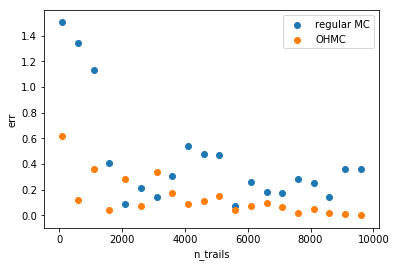

In [75]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

mc_trails = efficiency_df[efficiency_df["method"]=="MC"]["n_trails"]
mc_err = efficiency_df[efficiency_df["method"]=="MC"]["err"]
ax.scatter(mc_trails,mc_err,label="regular MC")

ohmc_trails = efficiency_df[efficiency_df["method"]=="OHMC"]["n_trails"]
ohmc_err = efficiency_df[efficiency_df["method"]=="OHMC"]["err"]
ax.scatter(ohmc_trails,ohmc_err,label="OHMC")
ax.legend()

plt.xlabel("n_trails")
plt.ylabel("err")

plt.show()

### 4.2 Runtime Efficiency Test

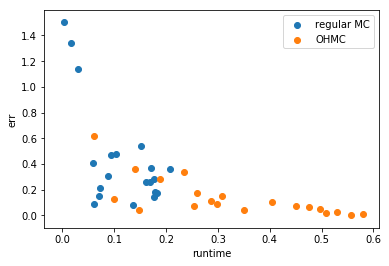

In [71]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

mc_runtime = efficiency_df[efficiency_df["method"]=="MC"]["runtime"]
mc_err = efficiency_df[efficiency_df["method"]=="MC"]["err"]
ax.scatter(mc_runtime,mc_err,label="regular MC")

ohmc_runtime = efficiency_df[efficiency_df["method"]=="OHMC"]["runtime"]
ohmc_err = efficiency_df[efficiency_df["method"]=="OHMC"]["err"]
ax.scatter(ohmc_runtime,ohmc_err,label="OHMC")
ax.legend()

plt.xlabel("runtime")
plt.ylabel("err")

plt.show()

### 4.3 Conclusion

From the test, one can see OHMC reduce the variance considerably, which make it more appreciable when number of trails is limited. For example, if we can only make trails less than 1000, OHMC is definite better than regular MC. However the runtime efficiency is similar based our observation. It seems slightly stable than regular MC, but still not enough to affirm that.